<a href="https://colab.research.google.com/github/aadhiadvaitha/Image-Classification/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kindly import the folder "data" containing folders "Elephant" and "Giraffe" under the folder sample data 
#The google drive link for the folders are shared
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

In [ ]:
import sys
import os
import numpy as np
datadir = sys.path.append('/content/sample_data/data')
import Elephant
import Giraffe

In [ ]:
#preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


datadir = '/content/sample_data/data'

target = []
images=[]
flat_data = []
#0 means elephant and 1 means giraffe
CATEGORIES = ['Elephant','Giraffe']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path = os.path.join(datadir,category)
  
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num) 

flat_data = np.array(flat_data)
target = np.array(target)
images=np.array(images)

In [ ]:
#flattening
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.015196,0.090196,0.013725,0.044608,0.159314,0.062990,0.026471,0.162745,0.044608,0.082353,0.211275,0.077696,0.070588,0.165441,0.039706,0.039706,0.088971,0.007353,0.005882,0.019363,0.000000,0.003676,0.017892,0.000000,0.212010,0.255392,0.201471,0.184804,0.266422,0.216912,0.100490,0.199020,0.112990,0.202696,0.266667,0.104902,0.311765,0.358824,0.205882,0.404412,...,0.390931,0.526471,0.236029,0.387010,0.528431,0.222304,0.409804,0.564461,0.257598,0.383088,0.529902,0.251716,0.391176,0.525490,0.278186,0.460539,0.583088,0.352696,0.446569,0.559559,0.327696,0.418873,0.525980,0.285049,0.458578,0.553186,0.314461,0.449510,0.531618,0.310049,0.445098,0.515441,0.321078,0.533824,0.593873,0.431373,0.405882,0.510784,0.276225,0
1,0.533056,0.662467,0.549974,0.438520,0.563029,0.479696,0.518709,0.636029,0.605827,0.599196,0.709327,0.723052,0.471039,0.573980,0.621039,0.496003,0.600000,0.648944,0.625235,0.731118,0.763144,0.507078,0.616882,0.626686,0.501572,0.609415,0.609915,0.485144,0.571418,0.614265,0.486971,0.573245,0.616382,0.595866,0.682141,0.725278,0.615964,0.702239,0.745376,0.557725,...,0.586752,0.664601,0.637820,0.618663,0.697095,0.660938,0.580441,0.660833,0.611059,0.514915,0.601190,0.514984,0.472101,0.551186,0.453801,0.466627,0.542118,0.426431,0.456389,0.525964,0.388056,0.383529,0.445915,0.303284,0.325480,0.380059,0.239971,0.322186,0.365252,0.232608,0.331784,0.367660,0.245801,0.353157,0.377010,0.251853,0.365569,0.385608,0.259255,0
2,0.526353,0.471413,0.301725,0.466824,0.427608,0.253020,0.360784,0.341176,0.202949,0.460000,0.420549,0.259294,0.530692,0.485020,0.328157,0.434880,0.407373,0.255316,0.593490,0.530196,0.377255,0.641396,0.566745,0.365412,0.681490,0.614654,0.391125,0.721578,0.658824,0.427451,0.694268,0.631523,0.364621,0.708549,0.653722,0.425016,0.725725,0.643137,0.466902,0.692627,...,0.988235,0.823529,0.529176,0.980392,0.796078,0.509879,0.984314,0.823680,0.549020,0.953098,0.776627,0.490353,0.941176,0.749020,0.478431,0.913725,0.717647,0.462745,0.952646,0.752941,0.478431,0.964885,0.776471,0.486510,0.941412,0.739112,0.462745,0.952941,0.752913,0.470588,0.964518,0.752941,0.474510,0.984314,0.770780,0.494118,0.972549,0.776471,0.505845,0
3,0.661503,0.594837,0.524615,0.671347,0.604680,0.534615,0.683427,0.616760,0.546172,0.690393,0.623727,0.553138,0.688575,0.621908,0.551320,0.695819,0.629152,0.558564,0.704957,0.638290,0.568277,0.699678,0.633012,0.562424,0.686983,0.620317,0.549728,0.699843,0.611402,0.555503,0.682422,0.592226,0.537686,0.669259,0.581216,0.524161,0.691782,0.604702,0.546684,0.721935,...,0.880719,0.747386,0.566993,0.897560,0.765420,0.587180,0.915752,0.762810,0.597529,0.916510,0.764271,0.597585,0.892967,0.741784,0.564722,0.908356,0.760842,0.582865,0.879438,0.730418,0.546105,0.875148,0.726129,0.537318,0.876941,0.725479,0.534225,0.874120,0.725073,0.529072,0.949346,0.804248,0.600327,0.933333,0.784667,0.605725,0.898745,0.746379,0.569908,0
4,0.269062,0.253376,0.320042,0.387549,0.371863,0.438529,0.388036,0.372350,0.439016,0.412337,0.396650,0.463317,0.345098,0.329412,0.396078,0.294827,0.279141,0.345807,0.403624,0.387938,0.454605,0.414431,0.398745,0.465412,0.344634,0.328948,0.391402,0.327882,0.312196,0.371056,0.331157,0.315471,0.374294,0.334127,0.318441,0.377265,0.335637,0.319951,0.378775,0.362088,...,0.789768,0.825062,0.891729,0.762748,0.798042,0.864709,0.720686,0.758922,0.824608,0.696170,0.743229,0.805974,0.706559,0.753618,0.816363,0.716657,0.763716,0.826461,0.724719,0.771778,0.834523,0.688892,0.735951,0.798696,0.708255,0.755314,0.818059,0.731941,0.779000,0.841745,0.755523,0.802582,0.865327,0.737696,0.784755,0.838353,0.559297,0.606356,0.653415,0


In [ ]:
flat_data

array([[0.01519608, 0.09019608, 0.01372549, ..., 0.40588235, 0.51078431,
        0.27622549],
       [0.53305556, 0.66246732, 0.54997386, ..., 0.36556863, 0.38560784,
        0.2592549 ],
       [0.52635294, 0.47141333, 0.30172549, ..., 0.97254902, 0.77647059,
        0.50584471],
       ...,
       [0.17533333, 0.18317647, 0.18186928, ..., 0.47562092, 0.58934641,
        0.22856209],
       [0.71372549, 0.8       , 0.88235294, ..., 0.46346405, 0.41248366,
        0.20856209],
       [0.67058824, 0.70588235, 0.77254902, ..., 0.73984314, 0.73592157,
        0.79866667]])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
np.unique(target,return_counts=True)

(array([0, 1]), array([60, 52]))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=0)


In [ ]:
#SVM using GridSearch CV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
             {'C':[1,10,100,1000],'kernel':['linear']}, 
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc=svm.SVC(probability=True)
dev=GridSearchCV(svc,param_grid)
dev.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
abc=svm.SVC(kernel='rbf',C=1,gamma='scale',random_state=0)

In [ ]:
y_pred=dev.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
y_test

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.6176470588235294

In [ ]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.69      0.58      0.63        19

    accuracy                           0.62        34
   macro avg       0.62      0.62      0.62        34
weighted avg       0.63      0.62      0.62        34



In [ ]:
#confusion matrix
confusion_matrix(y_pred,y_test)

array([[10,  5],
       [ 8, 11]])

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cross_val_score(SVC(),x_train,y_train)

array([0.875     , 0.5625    , 0.75      , 0.93333333, 0.8       ])

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
print(kf)

KFold(n_splits=10, random_state=1, shuffle=True)


In [ ]:
#accuracy score after cross validation
accuracy=cross_val_score(abc,x_train,y_train,scoring='accuracy',cv=10)
print(accuracy)
mean=np.mean(accuracy)
print(mean)

[0.875      0.875      0.625      0.75       0.875      0.75
 0.875      0.75       0.85714286 0.85714286]
0.8089285714285713


In [ ]:
import pickle
pickle.dump(dev,open('img_model.p','wb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/9/9f/Giraffe_standing.jpg
(2288, 1712, 3)
Predicted Output: [1]


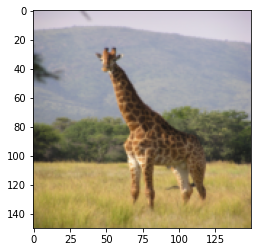

In [ ]:
#prediction for new image
# 0 is Elephant and 1 is Giraffe
model1=pickle.load(open('img_model.p','rb'))
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print (img.shape)
plt.imshow(img_resized)
y_output=model1.predict(flat_data)
y_output
print(f'Predicted Output: {y_output}')
